# Making Map with R

In [1]:
# name of the shapefile of North Carolina of the sf package
nameshp <- system.file("shape/nc.shp", package="sf")

In [2]:
# read shapefile with st_read()
library(sf)
map <- st_read(nameshp, quiet=TRUE)
class(map)

Warning message:
"package 'sf' was built under R version 4.0.3"
Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1



[1] "sf"         "data.frame"

In [3]:
head(map)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



AREA  PERIMETER CNTY_ CNTY_ID NAME        FIPS  FIPSNO CRESS_ID BIR74 SID74
1 0.114 1.442     1825  1825    Ashe        37009 37009   5       1091  1    
2 0.061 1.231     1827  1827    Alleghany   37005 37005   3        487  0    
3 0.143 1.630     1828  1828    Surry       37171 37171  86       3188  5    
4 0.070 2.968     1831  1831    Currituck   37053 37053  27        508  1    
5 0.153 2.206     1832  1832    Northampton 37131 37131  66       1421  9    
6 0.097 1.670     1833  1833    Hertford    37091 37091  46       1452  7    
  NWBIR74 BIR79 SID79 NWBIR79 geometry                      
1   10    1364  0       19    MULTIPOLYGON (((-81.47276 3...
2   10     542  3       12    MULTIPOLYGON (((-81.23989 3...
3  208    3616  6      260    MULTIPOLYGON (((-80.45634 3...
4  123     830  2      145    MULTIPOLYGON (((-76.00897 3...
5 1066    1606  3     1197    MULTIPOLYGON (((-77.21767 3...
6  954    1838  5     1237    MULTIPOLYGON (((-76.74506 3...

## ggplot2

In [4]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.0.3"


In [5]:
map <- st_as_sf(map)

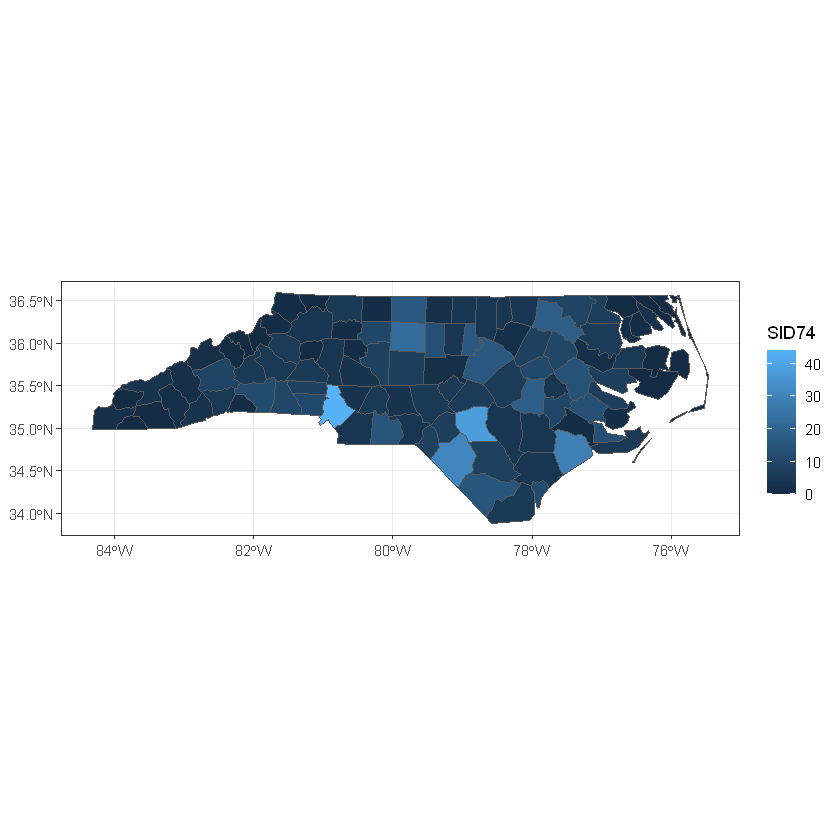

In [6]:
ggplot(map)+
    geom_sf(aes(fill=SID74)) + theme_bw()

Loading required package: viridisLite



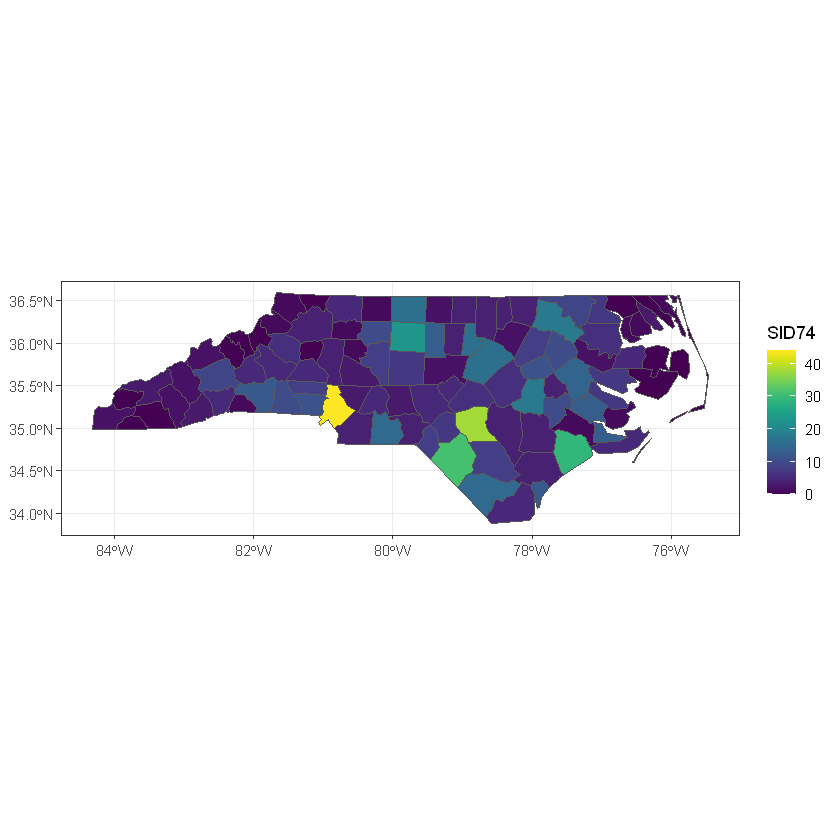

In [7]:
library(viridis)
map <- st_as_sf(map)
ggplot(map) + geom_sf(aes(fill = SID74))+
    scale_fill_viridis() + theme_bw()

In [18]:
# save plot
png("plot.png")
map <- st_as_sf(map)
ggplot(map) + geom_sf(aes(fill = SID74))+
    scale_fill_viridis() + theme_bw()
dev.off()

png 
  2

## leaflet

In [19]:
st_crs(map)

Coordinate Reference System:
  User input: EPSG:4236 
  wkt:
GEOGCRS["Hu Tzu Shan 1950",
    DATUM["Hu Tzu Shan 1950",
        ELLIPSOID["International 1924",6378388,297,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["Taiwan - onshore - mainland and Penghu"],
        BBOX[21.87,119.25,25.34,122.06]],
    ID["EPSG",4236]]

In [20]:
map <- st_transform(map, 4236)

In [22]:
library(leaflet)

pal <- colorNumeric("YlOrRd", domain = map$SID74)

leaflet(map) %>% 
    addTiles() %>%
    addPolygons(
        color = "white", fillColor = -pal(SID74),
        fillOpacity = 1
    ) %>%
    addLegend(pal = pal, values = -SID74, opacity = 1)

ERROR: Error in addLegend(., pal = pal, values = -SID74, opacity = 1): object 'SID74' not found


### mapview

In [24]:
library(mapview)
mapview(map, zcol = "SID74")